In [154]:
## examin the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import datetime

# part of maplotlib
%matplotlib inline

In [162]:
## import newdrivers.cscv
drivers = pd.read_csv(r'C:\Users\galmo\training\azrieli and banav\new_drivers.csv')
drivers.head()

,Unnamed: 0,birthdate,gender,id,vetek
0,0,19.06.1967,F,943,232.0
1,1,"february 13, 1979",M,966,28.0
2,2,19/11/1993,M,250,48.0
3,3,02/02/1961,NaN,156,272.0
4,4,07/03/1965,M,67,130.0


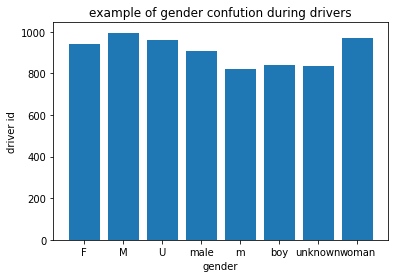

In [170]:
##visualization of drivers
drivers['gender'] = drivers['gender'].fillna('U')
plt.bar(drivers.gender, drivers.id)
plt.title("example of gender confution during drivers")
plt.xlabel("gender")
plt.ylabel("driver id")
plt.show()

In [6]:
##visualization of random trip datasheet
trip = pd.read_csv(r'C:\Users\galmo\training\azrieli and banav\trips_data\april 2015_4781357.csv')
trip.head()

,Unnamed: 0,customer,driver_id,end_time,km,start_time
0,0,aminach,976,2015-04-01 07:24:00,264.455454,2015-04-01 03:31:00
1,1,yes,851,2015-04-01 19:08:00,415.772558,2015-04-01 13:10:00
2,2,osem,626,2015-04-02 03:02:00,140.447201,2015-04-02 00:50:00
3,3,intel,186,2015-04-02 22:32:00,520.465430,2015-04-02 15:54:00
4,4,intel,430,2015-04-03 06:19:00,209.639043,2015-04-03 02:57:00


In [22]:
##type of km
trip.km.dtype

dtype('float64')

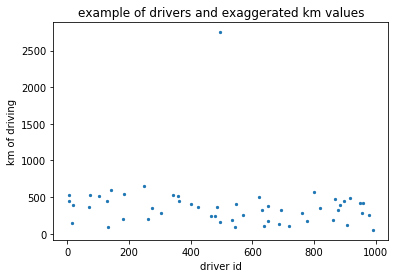

In [159]:
##km which are strange
trip1 = pd.read_csv(r'C:\Users\galmo\training\azrieli and banav\trips_data\april 2015_4781363.csv')
trip1.head()
plt.scatter(trip1.driver_id, trip1.km, s= 5)
plt.title("example of drivers and exaggerated km values")
plt.xlabel("driver id")
plt.ylabel("km of driving")
plt.show()

In [158]:
##arranging the taarif.csv
taarif = pd.read_csv(r'C:\Users\galmo\training\azrieli and banav\taarif.csv')
taarif.head()
## delete an empty first row
taarif = taarif.drop(labels=0, axis=0)
## changing huge values
taarif['weekend_bonus'] = taarif['weekend_bonus'].replace([500,70000],([50,70]))
taarif['basic_taarif']= taarif['basic_taarif'].fillna(5)
## insert bituach_leumi and zero nun data
taarif.fillna(0)
taarif



,customer,basic_taarif,extra_milage,night_bonus,weekend_bonus
1,jerusalem_muni,8.0,40.0,50.0,30.0
2,intel,8.0,6.0,20.0,0.0
3,mizranei_kfar_saba,15.0,4.0,0.0,25.0
4,dbs,10.0,8.0,0.0,25.0
5,tnuva,6.0,3.0,80.0,0.0
6,angel,1.0,5.0,100.0,0.0
7,telecommunication_ltd,7.0,7.0,10.0,40.0
8,osem,12.0,4.0,20.0,0.0
9,iaf,20.0,10.0,200.0,50.0
10,tara,6.0,6.0,50.0,30.0


In [4]:
MALE_NAMES = ['male','m','boy']
UKNOWN_NAMES = ['null','unknown','Nan','none']
ISHOT = ['woman', 'girl']

def reformat_new_drivers(path_to_ndriver):
    ## arranging new_drivers
    ndriver = pd.read_csv(path_to_ndriver)
    ## delete first column
    ndriver = ndriver.drop(ndriver.columns[0], axis=1)
    ndriver
    ## normalization of gender
    ndriver['gender'] = ndriver['gender'].replace(MALE_NAMES, 'M')
    ndriver['gender'] = ndriver['gender'].replace(UKNOWN_NAMES, 'U')
    ndriver['gender'] = ndriver['gender'].replace(ISHOT, 'F')
    ndriver['gender'] = ndriver['gender'].fillna('U')
    ##normalization of birthdate
    ndriver['birthdate'] = pd.to_datetime(ndriver['birthdate'])
    ##normalization of vetek
    ndriver['vetek']=(ndriver['vetek']/12)
    return ndriver

reformat_new_drivers(r'C:\Users\galmo\training\azrieli and banav\new_drivers.csv')

,birthdate,gender,id,vetek
0,1967-06-19,F,943,19.333333
1,1979-02-13,M,966,2.333333
2,1993-11-19,M,250,4.000000
3,1961-02-02,U,156,22.666667
4,1965-07-03,M,67,10.833333
...,...,...,...,...
95,1990-08-16,M,798,12.000000
96,1967-05-06,M,865,8.583333
97,1972-02-10,M,399,26.000000
98,1979-03-16,M,509,14.333333


In [5]:
## checking drivers with kviut
kvua = pd.read_csv(r'C:\Users\galmo\training\azrieli and banav\Drivers_with_kviut.csv')
kvua.info
kvua.id.unique()
kvua.info
kvua.head()
## normalization of gender
kvua['gender'] = kvua['gender'].replace(MALE_NAMES , 'M')
kvua['gender'] = kvua['gender'].replace(UKNOWN_NAMES, 'U')
kvua['gender'] = kvua['gender'].replace(ISHOT, 'F')
## deleting first columns
kvua = kvua.drop(kvua.columns[0], axis=1)
##normalization of birthdate
kvua['birthdate'] = pd.to_datetime(kvua['birthdate'])
kvua

,birthdate,gender,id,vetek
0,1964-05-27,M,502,7.9
1,1983-10-07,M,81,14.4
2,1992-10-15,M,814,18.7
3,1990-07-18,M,666,8.7
4,1969-10-04,M,205,9.9
...,...,...,...,...
895,1960-04-01,M,119,15.4
896,1983-12-08,M,236,6.7
897,1987-06-13,M,449,18.7
898,1977-02-21,M,494,7.9


In [194]:
## importing all of the trip dataframes
import os 
import pandas as pd
from datetime import datetime, timedelta, date, time
import glob


## Set the directory path where the dataframes are located
directory_path = r"C:\Users\galmo\training\azrieli and banav\trips_data"
############
filenames = glob.glob(directory_path+r"\*.csv")
############
os.listdir(directory_path)

## Initialize an empty list to store the dataframes
df_list = []

## Loop through each file in the directory and append its dataframe to the list
for filename in os.listdir(directory_path):
    if filename.endswith(').csv'):
        continue
    if filename.endswith('.csv'):
        filepath = os.path.join(directory_path, filename)
        df = pd.read_csv(filepath)
        df_list.append(df)

## fill in a non end_time culomns
def complete_hours(distance, start_time):
    start_time = datetime.strptime(start_time, '%Y-%m-%d %H:%M:%S')
    v=120
    duration= distance/v
    time_delta = timedelta(days=duration)
    end_time = start_time + time_delta
    return str(end_time)

## Concatenate all the dataframes in the list into a single dataframe
combined_df = pd.concat(df_list, ignore_index=True)
                        
## arrange the dataframe endtime
combined_df['end_time'] = pd.to_datetime(combined_df['end_time'])
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])
combined_df['end_time'] = pd.to_datetime(combined_df['end_time'])
combined_df['duration per km']= combined_df['km']/120

## Calculate time delta
combined_df['time_delta'] = combined_df['end_time'] - combined_df['start_time']
combined_df['time_delta_hours'] = combined_df['time_delta'] / pd.Timedelta(hours=1)
combined_df['new_end_time'] = combined_df.apply(lambda x: x['start_time'] + timedelta(hours=x['duration per km']), axis=1)
combined_df['end_time'] = combined_df['end_time'].fillna(combined_df['new_end_time'])


## change values of yes and hot
combined_df['customer'] = combined_df['customer'].replace(['yes'], 'dbs')
combined_df['customer'] = combined_df['customer'].replace(['hot'], 'telecommunication_ltd')
combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])
kvua['birthdate'] = pd.to_datetime(kvua['birthdate'])

## add an age column
merged_df = pd.merge(combined_df, kvua, left_on='driver_id', right_on='id')
merged_df['Age'] = merged_df['start_time']-merged_df['birthdate']
merged_df['Age'] = round(merged_df['Age'] / pd.Timedelta(weeks=52))

## taarif per customer table
customer_taarif = pd.merge(merged_df, taarif, left_on='customer', right_on='customer')

## calculate basic taarif
customer_taarif['basic_taarif_cal'] = customer_taarif.apply(lambda x: x['km'] * x['basic_taarif'] if x['km'] <= 200 else (200 * x['basic_taarif']), axis=1)
## calculate extramile taarif

customer_taarif['extra_milage_cal'] = customer_taarif.apply(lambda x: (x['km']-200) * x['extra_milage'] if x['km'] > 200 else 0, axis=1)

## calculate weekend_bonus
##function of day in the week
def Is_weekend(date):
    date = datetime.today().weekday()
    return date>5
    
# weekend bonus
customer_taarif['weeken_bonus_cal'] = customer_taarif.apply(lambda x: (x['km'] * (x['weekend_bonus']/100)) if Is_weekend(x['start_time']) and Is_weekend(x['new_end_time']) else (x['km'] * 0.5 * (x['weekend_bonus']/100)), axis=1)

## calculate the night_bonus
##function of checking if is night
NIGHT_START_TIME = 22
NIGHT_END_TIME = 6

def get_night_hours(start_time_dt, end_time_dt) -> float:
    """
    This function returns the number of hours (float) during the night.
    """
    night_start_dt = datetime.combine(start_time_dt.date(), time(NIGHT_START_TIME, 0))
    night_end_dt = datetime.combine(start_time_dt.date()+timedelta(days=1), time(NIGHT_END_TIME, 0))
    
    if end_time_dt<night_start_dt:
        return 0
    
    if start_time_dt<night_start_dt:
        if end_time_dt>night_end_dt:
            night_time = (night_end_dt-night_start_dt).total_seconds()
        else:
            night_time = (end_time_dt-night_start_dt).total_seconds()        
    else:
        if end_time_dt>night_end_dt:
            night_time = (night_end_dt-start_time_dt).total_seconds()
        else:
            night_time = (end_time_dt-start_time_dt).total_seconds()
            
    return night_time/3600
    
    
#     night_hours = 0
#     curr_time = start_time_str
    
#     while curr_time < end_time_str:
#         if curr_time.hour >= 22 or curr_time.hour < 6:
#             night_hours += 1
        
#         curr_time += timedelta(hours=0.5)
        
#     return night_hours

#help function for function for avarge speed
def avarage_speed(km, time_delta):
    v= km/time_delta
    return v

# night bonus
customer_taarif['night_bonus_cal'] = customer_taarif.apply(lambda x: avarage_speed(x['km'],x['time_delta_hours']) * (x['night_bonus']/100) * get_night_hours(x['start_time'],x['new_end_time']), axis=1)

# total salary
customer_taarif['Total_salary'] = customer_taarif.apply(lambda x: x['night_bonus_cal'] + x['weeken_bonus_cal'] + x['extra_milage_cal'] + x['basic_taarif_cal'], axis=1)


# the final solution
customer_taarif['month_column'] = customer_taarif['start_time'].apply(lambda x: str(x.year) + '-' + str(x.month).zfill(2))
customer_taarif = customer_taarif.groupby(['driver_id','month_column', 'gender', 'vetek', 'Age'])['km', 'Total_salary'].sum()  
customer_taarif = customer_taarif.reset_index()
customer_taarif
summary_df.to_csv('summary2.csv', index=True)
summary_df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:136: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


km  Total_salary
driver_id month_column gender vetek Age                             
1         2015-01      F      1.4   33.0  10889.440843  95581.296891
          2015-02      F      1.4   33.0   4990.144849  43828.918457
          2015-03      F      1.4   33.0   9194.813199  91227.741243
          2015-04      F      1.4   33.0   5997.860150  42993.881884
          2015-05      F      1.4   33.0  11673.409386  93760.354856
...                                                ...           ...
1000      2015-08      M      4.0   35.0   7766.158071  55007.237416
          2015-09      M      4.0   35.0   8301.536539  79780.539154
          2015-10      M      4.0   35.0   8047.895113  74973.974528
          2015-11      M      4.0   35.0   7875.961910  71446.130440
          2015-12      M      4.0   35.0   7537.938484  51692.196574

[11266 rows x 2 columns]

In [189]:
print(datetime.now().second)

17


In [128]:
# from datetime import datetime, time
# import pandas as pd



# def check_time_interval(start_time_str, end_time_str):
#     start_time = datetime.strptime(start_time_str, '%d/%m/%Y %H:%M')
#     end_time = datetime.strptime(end_time_str, '%d/%m/%Y %H:%M')
    
#     start_hour = start_time.hour
#     end_hour = end_time.hour

#     if start_hour >= 22 and start_hour < 6 or end_hour >= 22 or end_hour < 6:
#         return True
#     else:
#         interval = end_time - start_time
#         interval_hours = interval.total_seconds() / 3600
#         return interval_hours
    
# check_time_interval('01/04/2015 00:37', '01/04/2015 17:37')

# from datetime import datetime, timedelta

# def get_night_hours(start_time_str, end_time_str):
#     start_time = datetime.strptime(start_time_str, '%Y-%m-%d %H:%M:%S')
#     end_time = datetime.strptime(end_time_str, '%Y-%m-%d %H:%M:%S')
    
#     night_hours = 0
#     curr_time = start_time
    
#     while curr_time < end_time:
#         if curr_time.hour >= 22 or curr_time.hour < 6:
#             # increment night hours if current hour is between 22:00 and 06:00
#             night_hours += 1
        
#         # increment current time by one hour
#         curr_time += timedelta(hours=1)
        
#     return night_hours

# start_time_str = '01/04/2015 00:37'
# end_time_str = '01/04/2015 06:37'

# night_hours = get_night_hours(start_time_str, end_time_str)
# night_hours
# # Example usage
# start_time = datetime.datetime(2023, 3, 20, 20, 0, 0) # March 20, 2023 8:00 PM
# end_time = datetime.datetime(2023, 3, 21, 8, 0, 0) # March 21, 2023 8:00 AM

# if check_time_interval(start_time, end_time) == True:
#     print("The time interval is between 22:00 and 06:00")
# else:
#     print("The time interval is not between 22:00 and 06:00. The interval is", check_time_interval(start_time, end_time), "hours.")

# check_time_interval('01/04/2015 04:37', '01/04/2015 17:37')

## creating the summary.csv table
# for i in range(len(combined_df['km'])):
#     if combined_df.groupby('driver_id').km.sum()

## function of month
# def Get_month_and_year(date):
#     month = date.month
#     year = date.year
#     return (month, year)

# ## function of age
# def Age(df1,birthdate,current_date):
#     age= df1['current_date'].year-df1['birthdate'].year
# return age

# ##function of gender
# def Gender(df1,df2,)

# ##function of total km
# def Total_Km(df,km):
#     df[km]

# ##function of day in the week
# def Is_weekend(date):
#     date = datetime.today().weekday()
#     if date > 5:
#         return True 
#     else:
#         return False 


# ##function of night or not
#      def IsNight(date1):
#       start_time = time(22, 0) # 10:00 PM
#       end_time = time(6, 0) # 6:00 AM
#       start_datetime = datetime.combine(datetime.today(), start_time
#       end_datetime = datetime.combine(datetime.today(), end_time)
#       check_date = datetime(date1) 
#       is_between = (start_datetime <= check_date <= end_datetime)

# from datetime import datetime, time

# def IsNight(date_str):
#     # Parse the date string into a datetime object
#     dt = datetime.strptime(date_str, '%d/%m/%Y %H:%M')
#     # Extract the time component from the datetime object
#     t = dt.time()
#     # Define the start and end times
#     start_time = time(hour=22)
#     end_time = time(hour=6)
#     # Check if the time is between the start and end times, accounting for the possibility of wrapping around to the next day
#     if start_time <= t <= end_time or t <= end_time or t >= start_time:
#         return True
#     else:
#         return False

# IsNight('01/04/2015 04:37')
##function of total salary
# def Total_salary():
#      night_hours = date1.dt.hour >= 22 | date1.dt.hour < 6
#     if night_hours:
#         return True
#     else:
#         return False   

# define the start and end times of the interval

# create datetime objects for the start and end times, assuming today's date


# create the datetime object for the date we want to check
# replace with the date you want to check

# compare the check date with the start and end datetimes

    
    

6

In [38]:
# create an Summary DataFrame object
# import datetime
# import pandas as pd

# combined_df['start_time'] = pd.to_datetime(combined_df['start_time'])

# # Extract the year and month values from the date column
# combined_df['month_column'] = combined_df['start_time'].apply(lambda x: str(x.year) + '-' + str(x.month).zfill(2))
# combined_df= combined_df.groupby(['driver_id','month_column'])['km'].sum()  
# combined_df
# #age and gender by driver id

# merged_df = pd.merge(combined_df, kvua, left_on='driver_id', right_on='id')
# merged_df['Age']= combined_df['start_time'].year-merged_df['birthdate'].year

  


In [ ]:
## normelization of exaggerate values

##combined_df['duration'][combined_df['duration'] > one_day].index.to_numpy()
# for index, row in combined_df.iterrows():
#     if row['time_delta'] < timedelta(days=1) and row['km'] > 100:
#         combined_df.loc[combined_df['km'] > 100, 'km'] = combined_df.loc[combined_df['km'] > 100, 'km'].apply(lambda x: x * 0.1)
# combined_df.head(20)
# print(5)
# for km_value in range(len(combined_df['km'])):
#     if combined_df.loc[km_value, 'km'] > 1000 and combined_df[km_value,'duration'] > one_day:
#         combined_df.loc[km_value, 'km'] = combined_df.loc[km_value, 'km'] * 0.1
